<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_24_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv')

In [27]:
df.sample(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
226,15795224,Female,36,126000,1
276,15734312,Male,38,71000,0
46,15798850,Male,25,79000,0
257,15794493,Male,40,57000,0


In [28]:
df = df.iloc[:,2:]

In [29]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [16]:
input = ['Age','EstimatedSalary']
output = 'Purchased'

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[input], df['Purchased'],test_size = 0.3, random_state = 0)

x_train.shape, x_test.shape

((280, 2), (120, 2))

# Standardization

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

train_df = scaler.transform(x_train)
test_df = scaler.transform(x_test)

In [33]:
x_train_scaled = pd.DataFrame(train_df, columns = x_train.columns)
x_test_scaled = pd.DataFrame(test_df, columns = x_test.columns)

In [34]:
x_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [37]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# **Effects of Scaling**

In [38]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'After Plotting')

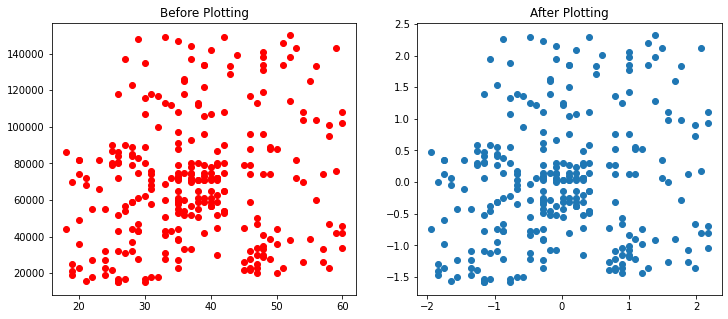

In [45]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'], color = 'red')
ax1.set_title('Before Plotting')

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'])
ax2.set_title('After Plotting')

The shape of the data is exactly same but we mean centered the data and restricted the data in standard deviation.

Let's Se, KDE plot for more clarity and importance

In [46]:
import seaborn as sns

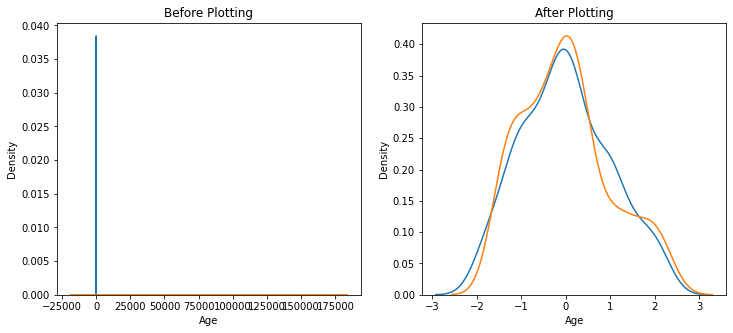

In [49]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.set_title('Before Plotting')
sns.kdeplot(x_train['Age'], ax = ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax = ax1)

ax2.set_title('After Plotting')
sns.kdeplot(x_train_scaled['Age'], ax = ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax = ax2)
plt.show()

This is very clear graph of the difference and importance of scaling and how it is giving importance to all the columns.

Let's see how individual columns are getting affected

<Axes: title={'center': 'Age distibution After Plotting'}, xlabel='Age', ylabel='Density'>

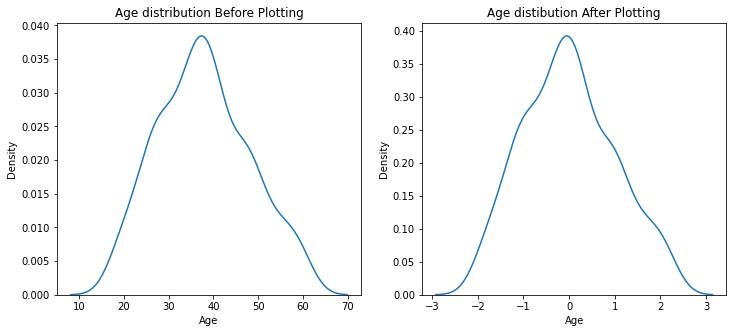

In [51]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.set_title('Age distribution Before Plotting')
sns.kdeplot(x_train['Age'], ax = ax1)

ax2.set_title('Age distibution After Plotting')
sns.kdeplot(x_train_scaled['Age'], ax = ax2)

No effect on distribution

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

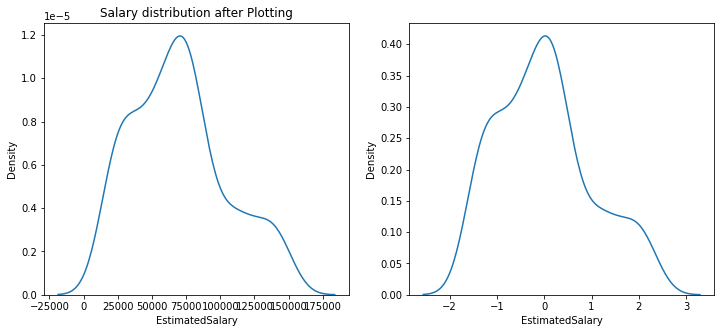

In [52]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.set_title('Salary distribution Before Plotting')
sns.kdeplot(x_train['EstimatedSalary'], ax = ax1)

ax1.set_title('Salary distribution after Plotting')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax = ax2)

No effect!


In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_scaled = LogisticRegression()

In [59]:
model.fit(x_train,y_train)
model_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [64]:
y_pred = model.predict(x_test)
y_scaled_pred = model_scaled.predict(x_test_scaled)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print('Without Scaled Accuracy Score is', accuracy_score(y_test, y_pred))
print('With Scaled Accuracy Score is', accuracy_score(y_test, y_scaled_pred))

Without Scaled Accuracy Score is 0.6583333333333333
With Scaled Accuracy Score is 0.8666666666666667


In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [69]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [70]:
y_pred = dt.predict(x_test)
y_scaled_pred = dt_scaled.predict(x_test_scaled)

In [71]:
print('Without Scaled Accuracy Score is', accuracy_score(y_test, y_pred))
print('With Scaled Accuracy Score is', accuracy_score(y_test, y_scaled_pred))

Without Scaled Accuracy Score is 0.8666666666666667
With Scaled Accuracy Score is 0.875


In [73]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# EFFECTS OF OUTLIER

In [74]:
df = df.append(pd.DataFrame({'Age':[5,90,110],'EstimatedSalary':[5000,210000,350000],'Purchased':[0,1,1]}))

<ipython-input-74-d594c47a7890>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,110],'EstimatedSalary':[5000,210000,350000],'Purchased':[0,1,1]}))


In [76]:
df.shape

(403, 3)

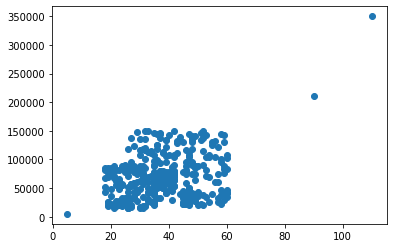

In [77]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[input], df['Purchased'],test_size = 0.3, random_state = 0)

x_train.shape, x_test.shape

((282, 2), (121, 2))

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

train_df = scaler.transform(x_train)
test_df = scaler.transform(x_test)

In [80]:
x_train_scaled = pd.DataFrame(train_df, columns = x_train.columns)
x_test_scaled = pd.DataFrame(test_df, columns = x_test.columns)

Text(0.5, 1.0, 'After Plotting')

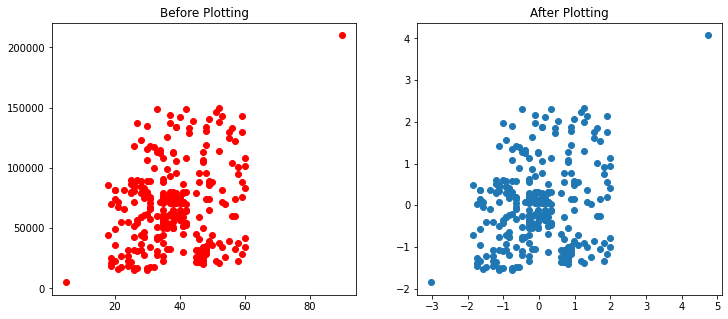

In [81]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'], color = 'red')
ax1.set_title('Before Plotting')

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'])
ax2.set_title('After Plotting')

So, it concludes that standardization doesnot impact on outliers or not solve problems due to outliers

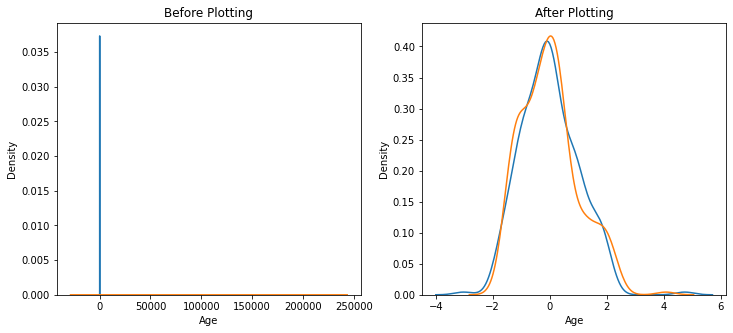

In [82]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.set_title('Before Plotting')
sns.kdeplot(x_train['Age'], ax = ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax = ax1)

ax2.set_title('After Plotting')
sns.kdeplot(x_train_scaled['Age'], ax = ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax = ax2)
plt.show()